# Titanic Dataset

# Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report

In [2]:
df = pd.read_csv(r"E:\Datasets\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA(exploratory data analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

# Feature engineering

In [7]:
## changed datatype (object)

In [8]:
label_encoder = preprocessing.LabelEncoder()
  
df['Name']= label_encoder.fit_transform(df['Name'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Ticket']= label_encoder.fit_transform(df['Ticket'])
df['Cabin']= label_encoder.fit_transform(df['Cabin'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [10]:
## Replaced null values

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mean())


In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
## checking outliers

In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

outliers = (df<lower_tail) | (df>upper_tail)
outliers_count = outliers.sum()
print(outliers_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             66
SibSp           46
Parch          213
Ticket           0
Fare           116
Cabin          204
Embarked         0
dtype: int64


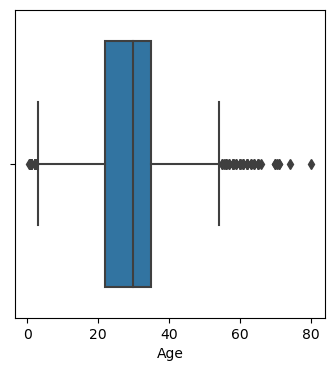

In [15]:
plt.figure(figsize=(4,4))  # Adjust the width and height as needed

sns.boxplot(x=df["Age"])

plt.show()

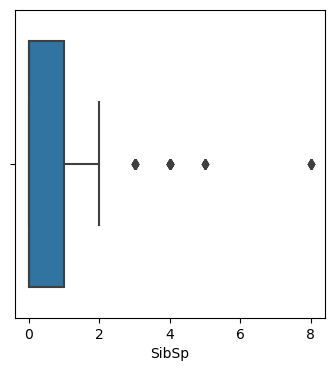

In [16]:
plt.figure(figsize=(4,4)) 

sns.boxplot(x=df["SibSp"])

plt.show()

In [17]:
## handleing outliers

In [18]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Age","Cabin","Fare","Parch","SibSp"]
Finding_outliar1(df,columns)

2.5
54.5
147.0
147.0
-26.724
65.6344
0.0
0.0
-1.5
2.5


# Feature Selection

<Axes: >

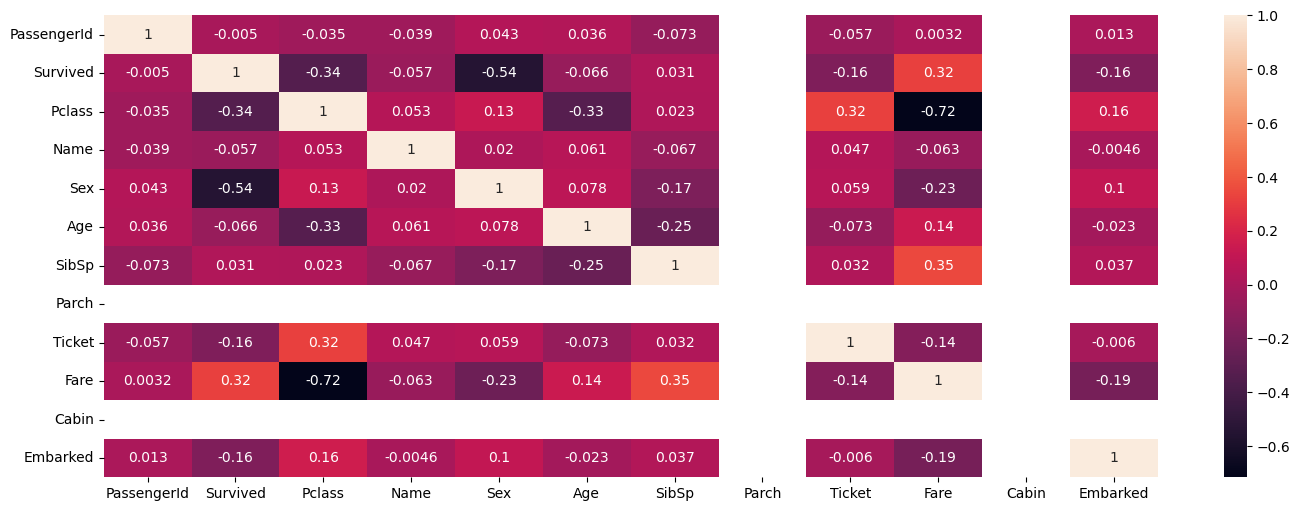

In [19]:
df.corr()
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot = True)

# Model Training

In [20]:
x = df.iloc[:,11].values.reshape(-1, 1)
y = df["Survived"]

In [21]:
df["Survived"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

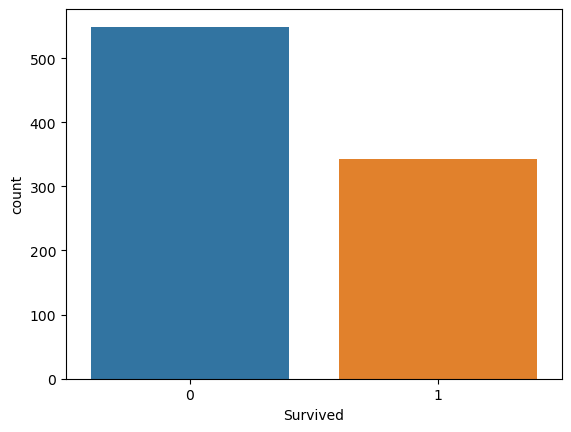

In [22]:
sns.countplot(x=df["Survived"])

In [23]:
#used standardiazation

In [24]:

Std = StandardScaler()
Std_array = Std.fit_transform(df.iloc[:,:11])
df2 = pd.DataFrame(Std_array)
df2

,0,1,2,3,4,5,6,7,8,9,10
0,-1.730108,-0.789272,0.827377,-1.310217,0.737695,-0.611917,0.810220,0.0,0.918966,-0.820552,0.0
1,-1.726220,1.266990,-1.566107,-0.991410,-1.355574,0.715304,0.810220,0.0,1.282625,2.031623,0.0
2,-1.722332,1.266990,0.827377,-0.357685,-1.355574,-0.280111,-0.602512,0.0,1.646283,-0.787578,0.0
3,-1.718444,1.266990,-1.566107,-0.672604,-1.355574,0.466450,0.810220,0.0,-1.442322,1.419297,0.0
4,-1.714556,-0.789272,0.827377,-1.671790,0.737695,0.466450,-0.602512,0.0,0.664904,-0.781471,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.400452,0.737695,-0.197160,-0.602512,0.0,-1.183277,-0.539655,0.0
887,1.718444,1.266990,-1.566107,-0.552079,-1.355574,-0.860771,-0.602512,0.0,-1.616678,0.290823,0.0
888,1.722332,-0.789272,0.827377,-0.124412,-1.355574,0.026735,0.810220,0.0,1.676173,-0.029155,0.0
889,1.726220,1.266990,-1.566107,-1.415189,0.737695,-0.280111,-0.602512,0.0,-1.646568,0.290823,0.0


In [25]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3 , stratify = y)

In [27]:
## Applied Logistic regression

In [28]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression(multi_class='ovr')

In [29]:
## 1.Training Data

In [30]:
y_pred_train = log_reg_model.predict(xtrain)

In [31]:
accuracy = accuracy_score(ytrain,y_pred_train)
print(f"Accuracy : {accuracy}")


multi_confusion_matrix = multilabel_confusion_matrix(ytrain,y_pred_train)
print(multi_confusion_matrix)


class_report = classification_report(ytrain,y_pred_train)
print(class_report)


Accuracy : 0.8089887640449438
[[[170  69]
  [ 50 334]]

 [[334  50]
  [ 69 170]]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       384
           1       0.77      0.71      0.74       239

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.81      0.81      0.81       623



In [32]:
## 2.Testing Data

In [33]:
y_pred_test = log_reg_model.predict(xtest)
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")


multi_confusion_matrix = multilabel_confusion_matrix(ytest,y_pred_test)
print(multi_confusion_matrix)


class_report = classification_report(ytest,y_pred_test)
print(class_report)


Accuracy : 0.7761194029850746
[[[ 66  37]
  [ 23 142]]

 [[142  23]
  [ 37  66]]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       165
           1       0.74      0.64      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268



In [34]:
## Confusion matrix

<Axes: >

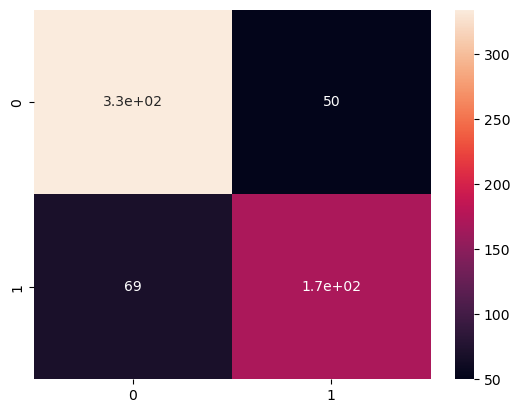

In [35]:
conf_matrix = confusion_matrix(ytrain,y_pred_train)
sns.heatmap(conf_matrix,annot=True)

In [36]:
## Random Forest 

In [37]:
Rf_clf = RandomForestClassifier()
Rf_clf

RandomForestClassifier()

In [38]:
Rf_clf_model = Rf_clf.fit(xtrain,ytrain)
Rf_clf_model

RandomForestClassifier()

In [39]:
## 1.Training Data

In [40]:
y_pred_train = Rf_clf_model.predict(xtrain)

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       239

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



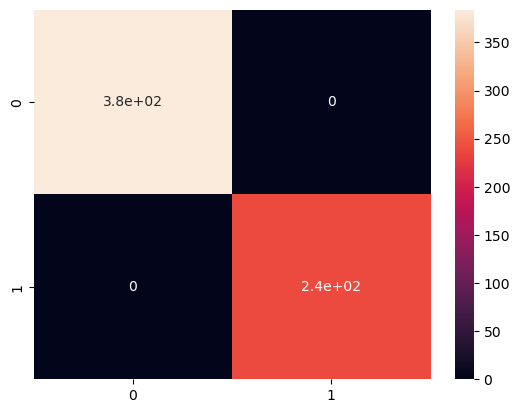

In [41]:
print("Accuracy = ",accuracy_score(ytrain,y_pred_train))
sns.heatmap(confusion_matrix(ytrain,y_pred_train),annot= True)
print(classification_report(ytrain,y_pred_train))

In [42]:
## 2.Testing Data

Accuracy =  0.8246268656716418
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.84      0.67      0.75       103

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



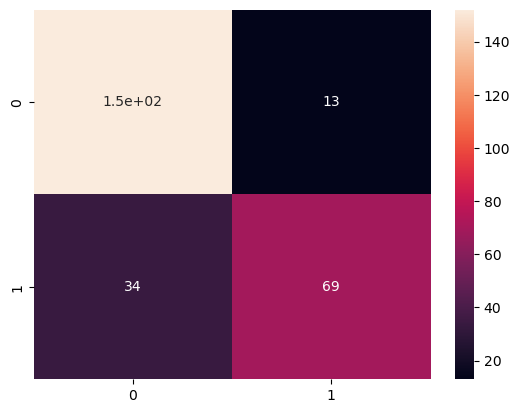

In [43]:
y_pred_test = Rf_clf_model.predict(xtest)
ypred_test = Rf_clf_model.predict(xtest)
print("Accuracy = ",accuracy_score(ytest,ypred_test))
sns.heatmap(confusion_matrix(ytest,ypred_test),annot = True)
print(classification_report(ytest,ypred_test))

In [44]:
## RF Hyperparameters

In [45]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,10),
    "n_estimators":np.array([1,100]),
    "max_features":["auto"]

} 

In [46]:
rf=RandomizedSearchCV(Rf_clf_model,hyperparameters,cv=5)
rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([  1, 100])})

In [47]:
rf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([  1, 100])})

In [48]:
rf_model=rf.fit(xtrain,ytrain)
rf_model
warnings.filterwarnings("ignore")

In [49]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=6, max_features='auto', min_samples_leaf=3,
                       min_samples_split=16)

In [50]:
hyper_rf_model=RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=7,
                       min_samples_split=17)

In [51]:
hyper_rf_model.fit(xtrain,ytrain)
warnings.filterwarnings("ignore")

In [52]:
## Training data

In [53]:
ypred_train = rf.predict(xtrain)

cnf_matrix = confusion_matrix(ytrain,ypred_train)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(ytrain,ypred_train)
print("Accuracy :",accuracy)


clf_report = classification_report(ytrain,ypred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[371  13]
 [ 57 182]]
Accuracy : 0.8876404494382022
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       384
           1       0.93      0.76      0.84       239

    accuracy                           0.89       623
   macro avg       0.90      0.86      0.88       623
weighted avg       0.89      0.89      0.88       623



In [54]:
## Testing data


In [55]:
ypred_test = rf.predict(xtest)

cnf_matrix = confusion_matrix(ytest,ypred_test)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(ytest,ypred_test)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(ytest,ypred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[155  10]
 [ 41  62]]
************************************************************
Accuracy : 0.8097014925373134
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       165
           1       0.86      0.60      0.71       103

    accuracy                           0.81       268
   macro avg       0.83      0.77      0.78       268
weighted avg       0.82      0.81      0.80       268

